# PC-Datenset Key-facts

Quelle der Daten:
https://www.kaggle.com/competitions/computer-prices-2025/data

#### Imports:

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

## Tom

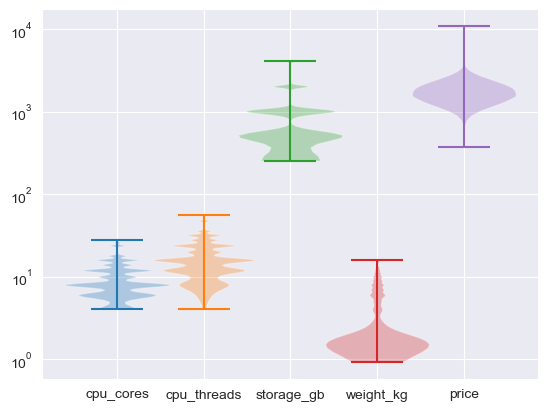

In [30]:
pcs = pd.read_csv('./computer_prices_all.csv').drop(columns=['model', 'warranty_months', 'bluetooth', 'wifi','resolution']).drop(columns=['psu_watts', 'charger_watts', 'battery_wh', 'refresh_hz'])
pcs = pcs.drop(columns=['gpu_model','release_year','storage_drive_count'])
nnomPcs = pcs.drop(columns=["device_type","brand","os","form_factor","cpu_brand","cpu_model","gpu_brand","storage_type","display_type"])
h = nnomPcs.values.transpose()
r = range(0,5)
ind = [1,2,8,10,11]

for i in r:
    plt.violinplot(h[ind[i]], [i], widths=1.2)
plt.xticks(r, nnomPcs.columns[ind])
plt.yscale('log')
plt.show()

## [SQUA7426](https://github.com/SQUA7426)

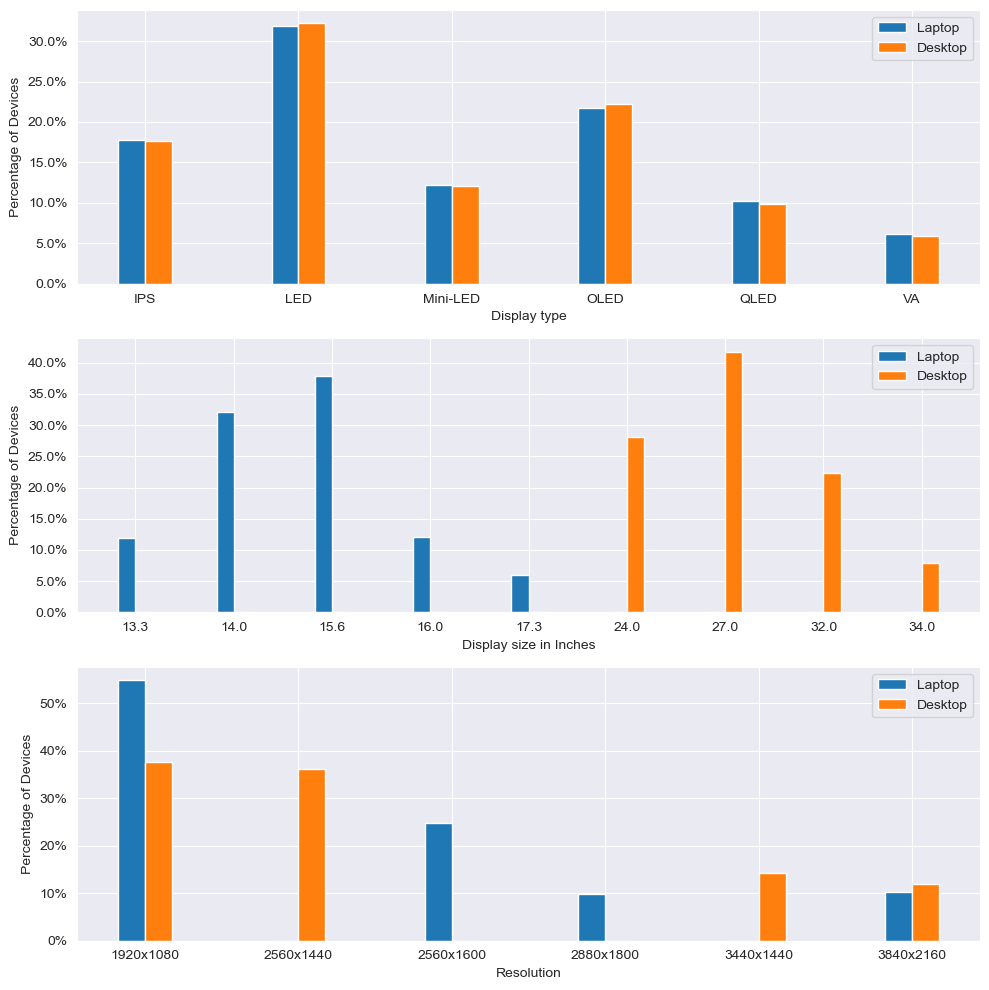

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
ax0, ax1, ax2 = axes.flatten()  # ensures axes are usable

display_types = sorted(df['display_type'].dropna().unique())
lap_counts = laptops['display_type'].value_counts(normalize=True).reindex(display_types, fill_value=0)
desk_counts = desktops['display_type'].value_counts(normalize=True).reindex(display_types, fill_value=0)

x = np.arange(len(display_types))
width = 0.35

ax0.bar(x - width/4, lap_counts * 100, width/2, label='Laptop')
ax0.bar(x + width/4, desk_counts * 100, width/2, label='Desktop')
ax0.set_xticks(x)
ax0.set_xticklabels(display_types)
ax0.set_xlabel('Display type')
ax0.set_ylabel(y)
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.legend()

sizes = sorted(df['display_size_in'].dropna().unique())
lap_size_counts = laptops['display_size_in'].value_counts(normalize=True).reindex(sizes, fill_value=0)
desk_size_counts = desktops['display_size_in'].value_counts(normalize=True).reindex(sizes, fill_value=0)

x = np.arange(len(sizes))
ax1.bar(x - width/4, lap_size_counts * 100, width/2, label='Laptop')
ax1.bar(x + width/4, desk_size_counts * 100, width/2, label='Desktop')
ax1.set_xticks(x)
ax1.set_xticklabels(sizes)
ax1.set_xlabel('Display size in Inches')
ax1.set_ylabel(y)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.legend()

resolutions = sorted(df['resolution'].dropna().unique())
lap_res_counts = laptops['resolution'].value_counts(normalize=True).reindex(resolutions, fill_value=0)
desk_res_counts = desktops['resolution'].value_counts(normalize=True).reindex(resolutions, fill_value=0)

x = np.arange(len(resolutions))
ax2.bar(x - width/4, lap_res_counts * 100, width/2, label='Laptop')
ax2.bar(x + width/4, desk_res_counts * 100, width/2, label='Desktop')
ax2.set_xticks(x)
ax2.set_xticklabels(resolutions)
ax2.set_xlabel('Resolution')
ax2.set_ylabel(y)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend()

plt.tight_layout()
plt.show()

## [Alex](https://github.com/Guakocius/htwg/blob/fachschaft-messagebot/sem3/stoch/homework/exerc3/solution.py)

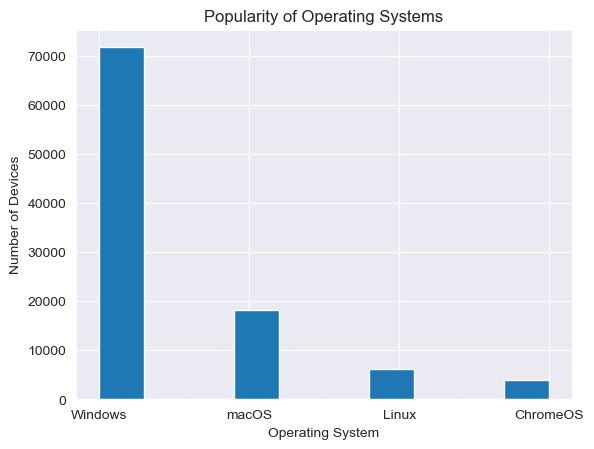

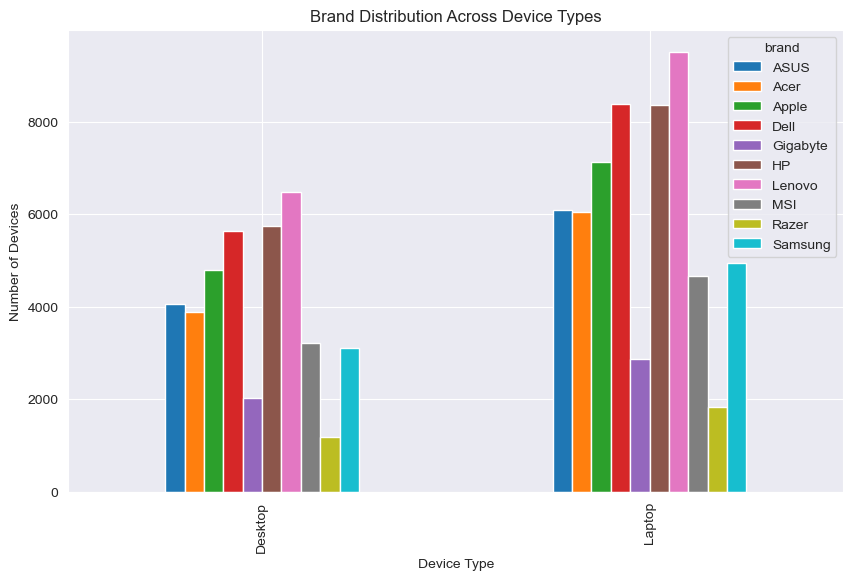

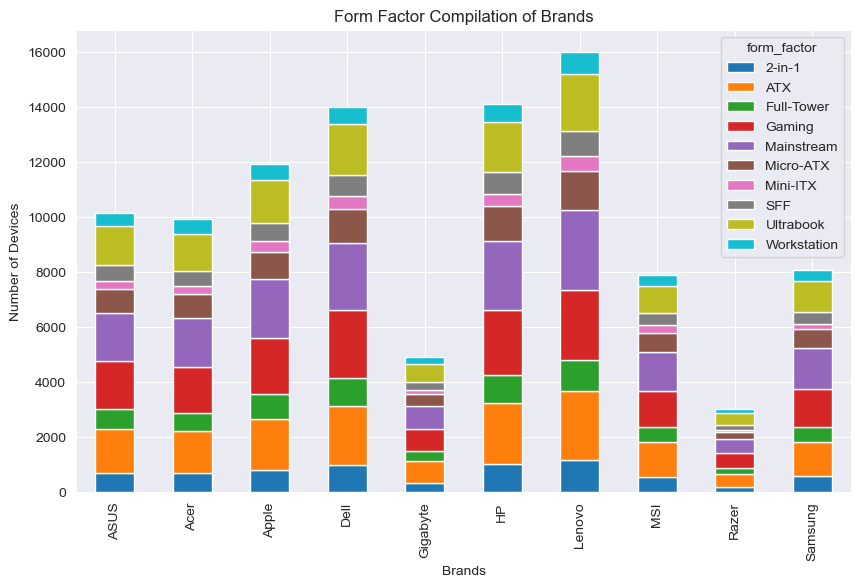

In [32]:
df = pd.read_csv("./computer_prices_all.csv")

#dev = df["device_type"].to_numpy()
os = df["os"].to_numpy()
#brands = df["brand"].to_numpy()
#form_factor = df["form_factor"].to_numpy()

y = "Number of Devices"

#bins = ["Windows", "macOS", "Linux", "ChromeOS"]
# Operating Systems - Popularity
plt.hist(os)
plt.title("Popularity of Operating Systems")
plt.xlabel("Operating System")
plt.ylabel(y)
plt.show()
#plt.savefig("os_pop.jpg")

# Brands on Desktop / Laptop
#df.groupby(["device_type", "brand"]).size().unstack().plot(kind="bar", stacked=True, figsize=(10,6))
df.groupby(["device_type", "brand"]).size().unstack().plot(kind="bar", stacked=False, figsize=(10,6))
plt.title("Brand Distribution Across Device Types")
plt.xlabel("Device Type")
plt.ylabel(y)
plt.show()
#plt.savefig("brands_dev_stacked.jpg")
#plt.savefig("brands_dev_non_stacked.jpg")


df.groupby(["brand", "form_factor"]).size().unstack().plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Form Factor Compilation of Brands")
plt.xlabel("Brands")
plt.ylabel(y)
plt.show()



## Herbert

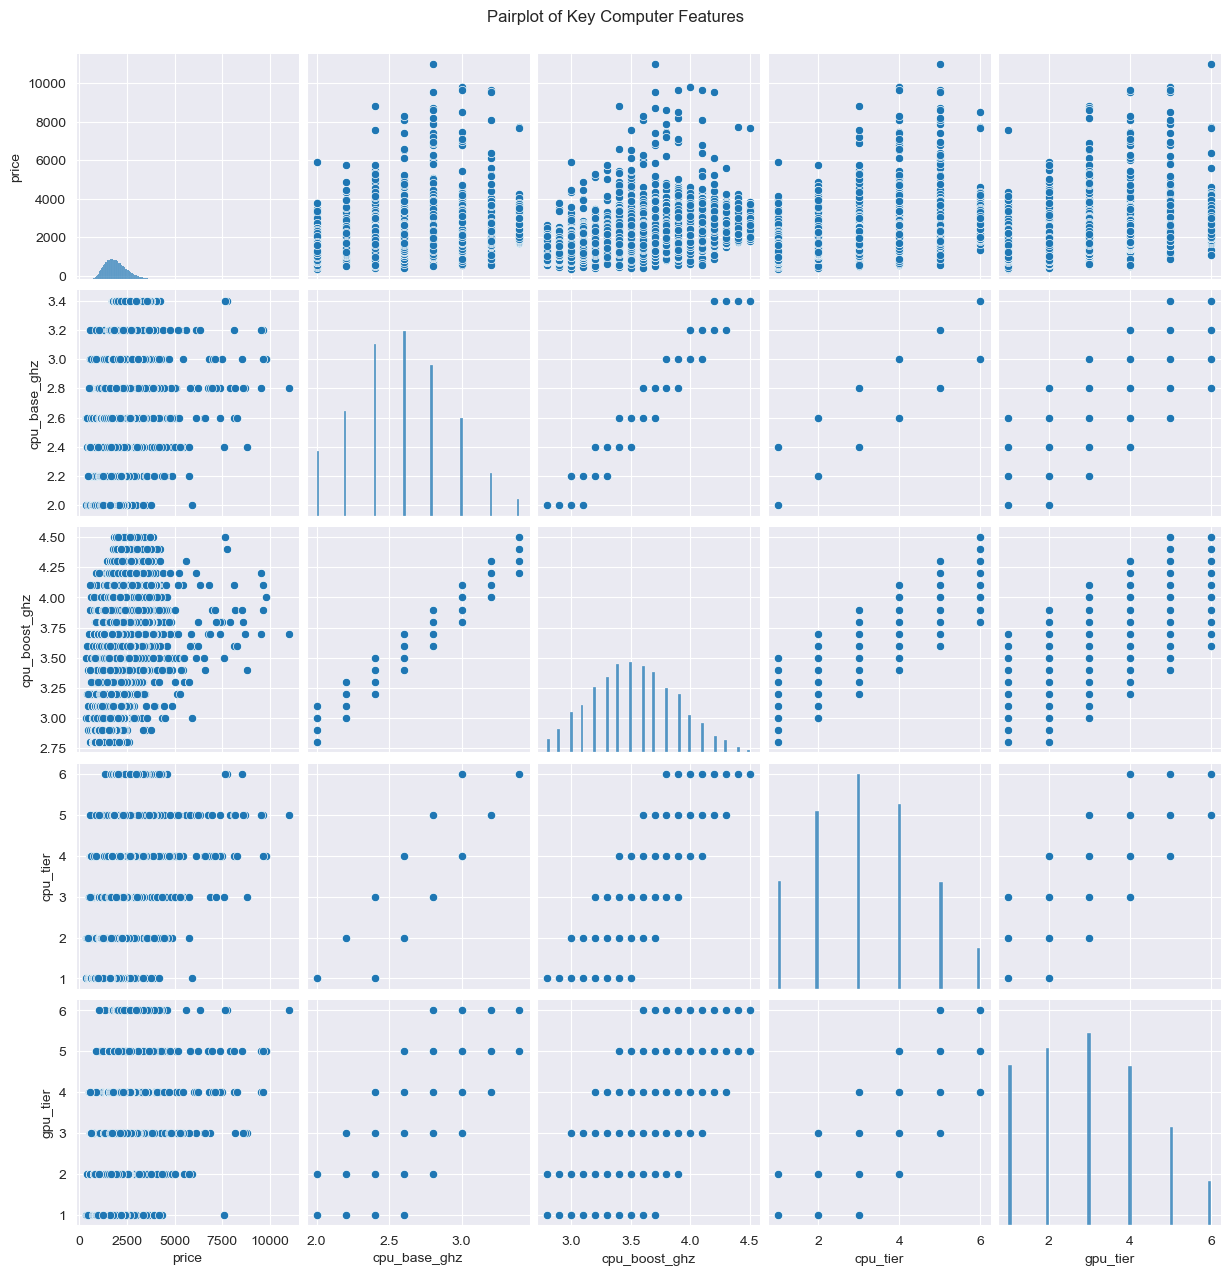

                  price  cpu_base_ghz  cpu_boost_ghz  cpu_tier  gpu_tier  \
price          1.000000      0.529910       0.508507  0.759196  0.762875   
cpu_base_ghz   0.529910      1.000000       0.960884  0.812598  0.756057   
cpu_boost_ghz  0.508507      0.960884       1.000000  0.780649  0.725862   
cpu_tier       0.759196      0.812598       0.780649  1.000000  0.857225   
gpu_tier       0.762875      0.756057       0.725862  0.857225  1.000000   
ram_gb         0.758654      0.761927       0.731896  0.899349  0.912918   
vram_gb        0.305017      0.365730       0.351984  0.409049  0.498624   
cpu_cores      0.720464      0.784946       0.754672  0.937376  0.812393   
cpu_threads    0.577503      0.711287       0.684021  0.848197  0.735096   

                 ram_gb   vram_gb  cpu_cores  cpu_threads  
price          0.758654  0.305017   0.720464     0.577503  
cpu_base_ghz   0.761927  0.365730   0.784946     0.711287  
cpu_boost_ghz  0.731896  0.351984   0.754672     0.684021  

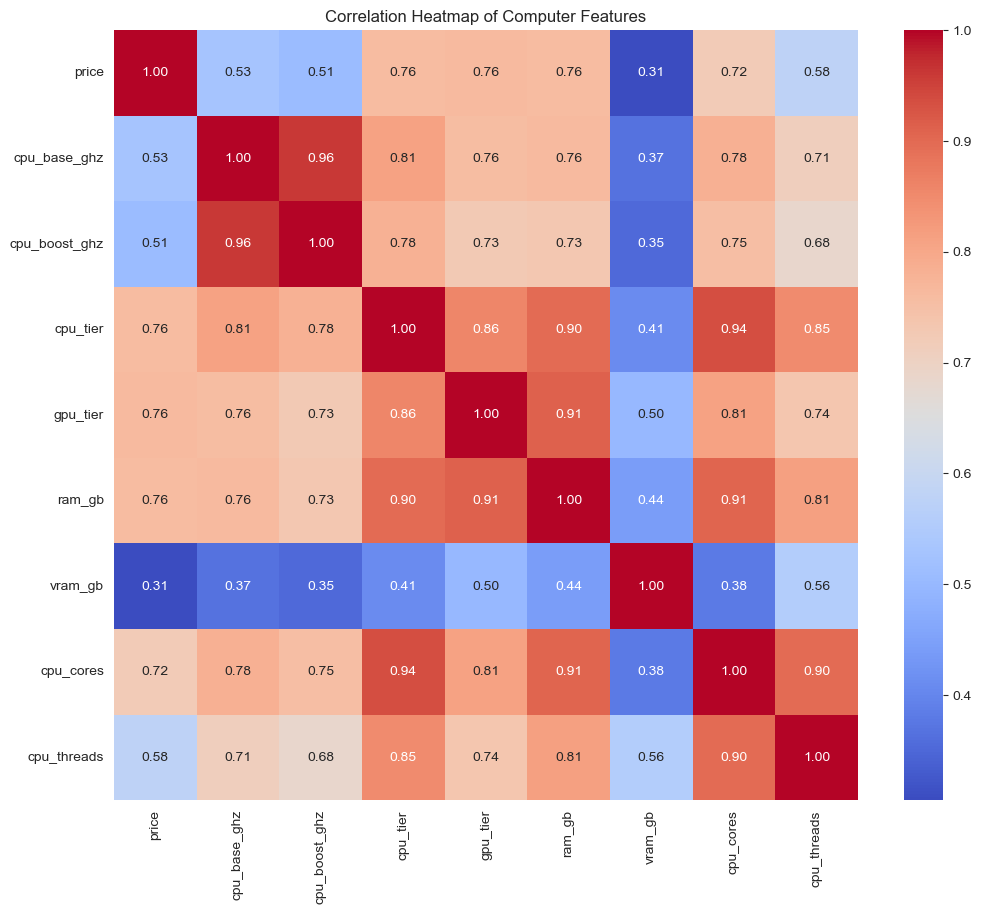

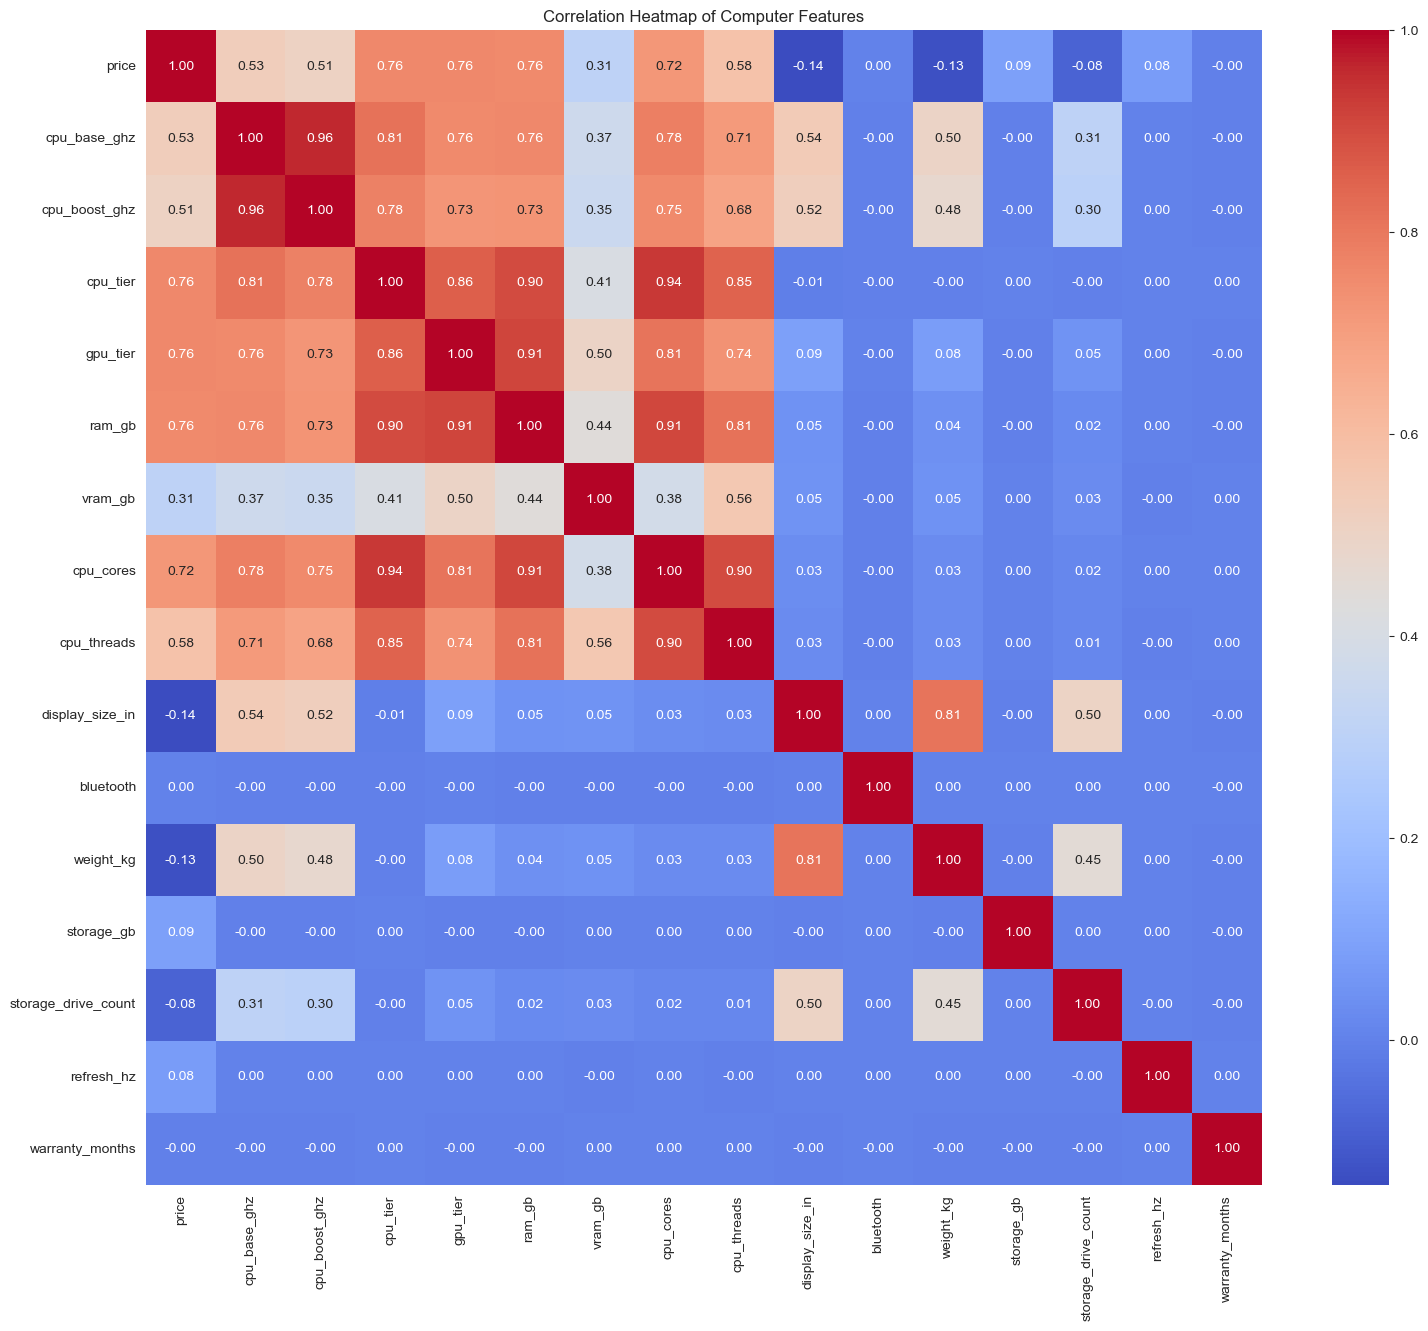

In [33]:

numerical_cols = [
    "price", "cpu_base_ghz", "cpu_boost_ghz", "cpu_tier", "gpu_tier",
    "ram_gb", "vram_gb", "cpu_cores", "cpu_threads"
]

computers_pd = pd.read_csv('./computer_prices_all.csv')


sns.pairplot(computers_pd[numerical_cols[0:5]])
plt.suptitle("Pairplot of Key Computer Features", y=1.02) # Title above the plot
plt.show()

computers_numerical_pd = computers_pd[numerical_cols]
computers = computers_numerical_pd.values

corr_matrix_pd = computers_numerical_pd.corr()
print(corr_matrix_pd)


# kleine heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix_pd,
    annot=True,     # Show the numbers in each cell
    cmap='coolwarm',  # Use a diverging colormap
    fmt=".2f"       # Format numbers to 2 decimal places
)
plt.title("Correlation Heatmap of Computer Features")
plt.show()

# grosse heatmap


more_cols = [
    "price", "cpu_base_ghz", "cpu_boost_ghz", "cpu_tier", "gpu_tier","ram_gb", "vram_gb", "cpu_cores", "cpu_threads", "display_size_in", "bluetooth", "weight_kg", "storage_gb", "storage_drive_count", "refresh_hz", "warranty_months"
]
computers_numerical_pd = computers_pd[more_cols]
corr_matrix_pd = computers_numerical_pd.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(
    corr_matrix_pd,
    annot=True,     # Show the numbers in each cell
    cmap='coolwarm',  # Use a diverging colormap
    fmt=".2f"       # Format numbers to 2 decimal places
)
plt.title("Correlation Heatmap of Computer Features")
plt.show()

## Nicholas

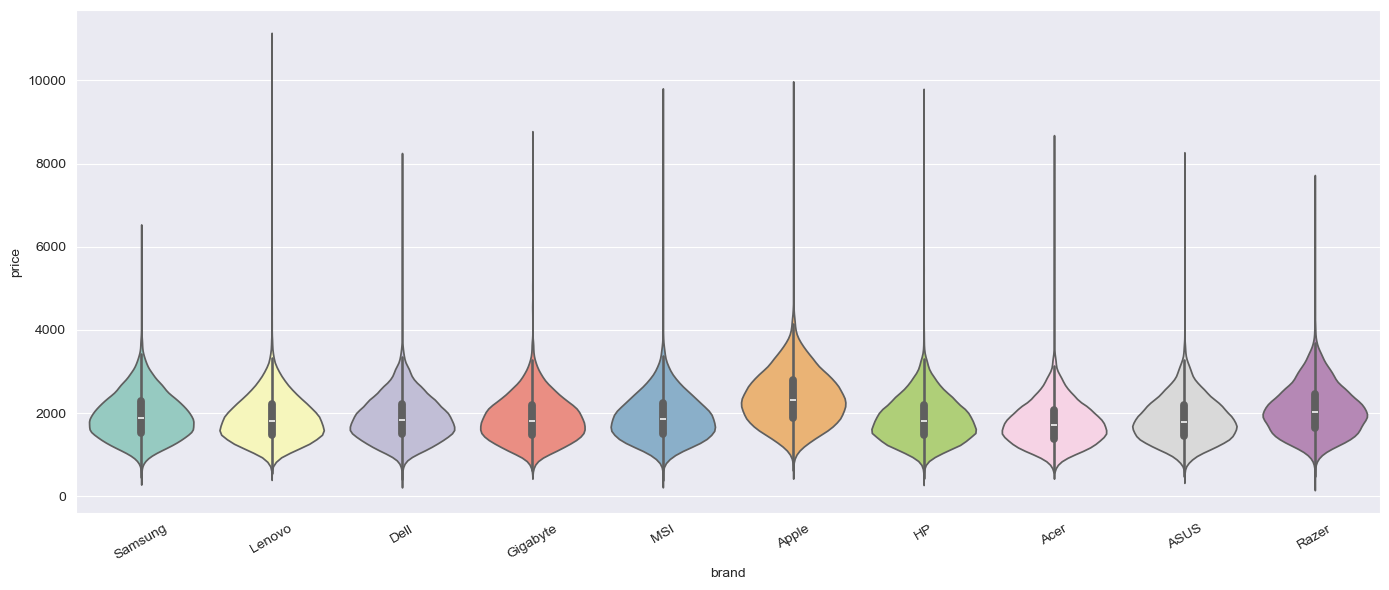

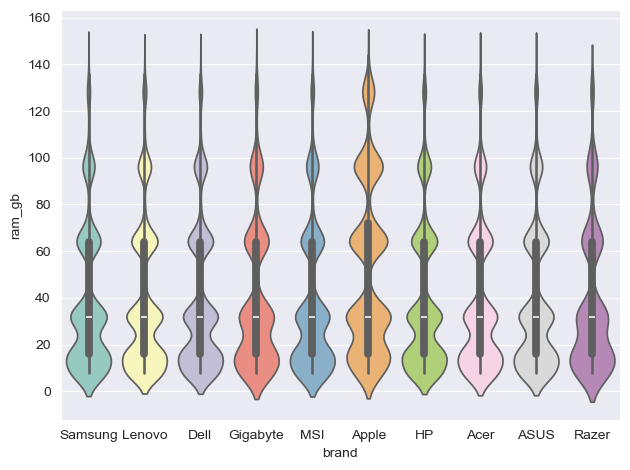

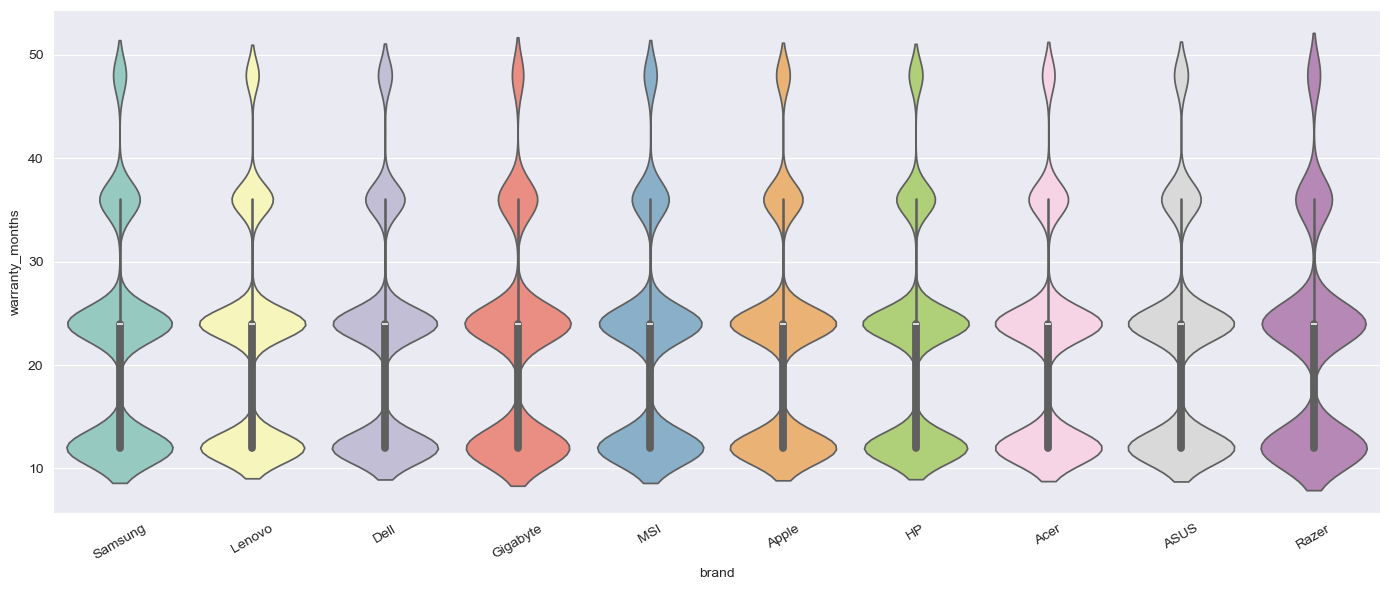

In [34]:
pcs = pd.read_csv("computer_prices_all.csv").drop(columns=['model', 'bluetooth', 'wifi','resolution']).drop(columns=['psu_watts', 'charger_watts', 'battery_wh', 'refresh_hz'])
pcs = pcs.drop(columns=['gpu_model','release_year','storage_drive_count'])
nnomPcs = pcs.drop(columns=["device_type","os","form_factor","cpu_brand","cpu_model","gpu_brand","storage_type","display_type"])
#brand vs. price------------------------------------------------------------------------------------------
#drop = ['gpu_model','release_year','storage_drive_count','model', 'bluetooth', 'wifi','resolution','psu_watts', 'charger_watts', 'battery_wh', 'refresh_hz',"device_type","os","form_factor","cpu_brand","cpu_model","gpu_brand","storage_type","display_type",'cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz',
#       'cpu_boost_ghz', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_gb',
#       'display_size_in', 'weight_kg', 'warranty_months']

brandcost = nnomPcs.drop(columns=['cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz',
       'cpu_boost_ghz', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_gb',
       'display_size_in', 'weight_kg', 'warranty_months'])
plt.figure(figsize=(14, 6))
sns.violinplot(x='brand',
               y='price',
               data=brandcost,
               palette='Set3',
               legend=False,
               hue='brand')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
#brand vs. performance--------------------------------------------------------------------------------------------------
brandperformance = nnomPcs.drop(columns=['cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz',
       'cpu_boost_ghz', 'gpu_tier', 'vram_gb', 'storage_gb',
       'display_size_in', 'weight_kg','price', 'warranty_months'])

sns.violinplot(brandperformance,
               x = 'brand',
               y = 'ram_gb',
               hue='brand',
               palette= 'Set3',
               legend=False)
plt.tight_layout()
plt.show()
#brand vs. warranty
warrant_per_brand = nnomPcs.drop(columns=['cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz',
       'cpu_boost_ghz', 'gpu_tier', 'vram_gb', 'storage_gb',
       'display_size_in', 'weight_kg', 'price', 'ram_gb', 'price'])

plt.figure(figsize=(14, 6))
sns.violinplot(
    x='brand',
    y='warranty_months',
    data=warrant_per_brand,
    hue='brand',           # Hinzugefügt
    palette='Set3',        # Kann jetzt ohne Warnung verwendet werden
    legend=False           # Legende deaktivieren
)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()